<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/Stock_Market_Analysis_09_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/stocks.csv')

Mounted at /content/stocks.csv


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# Go deeper into these process on the documentation

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-05,137.729996,137.800003,135.820007,137.270004,137.270004,40636700,AMAZON
2023-09-06,136.320007,137.449997,134.610001,135.360001,135.360001,41785500,AMAZON
2023-09-07,133.899994,138.029999,133.160004,137.850006,137.850006,48498900,AMAZON
2023-09-08,136.860001,138.850006,136.750000,138.229996,138.229996,38348200,AMAZON
2023-09-11,138.750000,143.619995,138.639999,143.100006,143.100006,56764500,AMAZON
2023-09-12,142.320007,143.000000,140.610001,141.229996,141.229996,42668500,AMAZON
2023-09-13,140.949997,144.979996,140.869995,144.850006,144.850006,60465200,AMAZON
2023-09-14,145.080002,145.860001,142.949997,144.720001,144.720001,64033600,AMAZON
2023-09-15,142.690002,143.570007,140.089996,140.389999,140.389999,102861700,AMAZON


In [59]:
# Getting the Data
# The first step is to get the data and load it to memory.
# We will get our stock data from the Yahoo Finance website.
# Yahoo Finance is a rich resource of financial market data and tools to find compelling investments.
# To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo.
# Check this article to learn more about yfinance: Reliably download historical market data from with Python



# 1. What was the change in price of the stock overtime?

# In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-05,137.729996,137.800003,135.820007,137.270004,137.270004,40636700,AMAZON
2023-09-06,136.320007,137.449997,134.610001,135.360001,135.360001,41785500,AMAZON
2023-09-07,133.899994,138.029999,133.160004,137.850006,137.850006,48498900,AMAZON
2023-09-08,136.860001,138.850006,136.750000,138.229996,138.229996,38348200,AMAZON
2023-09-11,138.750000,143.619995,138.639999,143.100006,143.100006,56764500,AMAZON
2023-09-12,142.320007,143.000000,140.610001,141.229996,141.229996,42668500,AMAZON
2023-09-13,140.949997,144.979996,140.869995,144.850006,144.850006,60465200,AMAZON
2023-09-14,145.080002,145.860001,142.949997,144.720001,144.720001,64033600,AMAZON
2023-09-15,142.690002,143.570007,140.089996,140.389999,140.389999,102861700,AMAZON


In [60]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-19,149.309998,154.559998,149.100006,154.479996,153.568954,81474200,APPLE
2022-09-20,153.399994,158.080002,153.080002,156.899994,155.974701,107689800,APPLE
2022-09-21,157.339996,158.740005,153.600006,153.720001,152.813446,101696800,APPLE
2022-09-22,152.380005,154.470001,150.910004,152.740005,151.839233,86652500,APPLE
2022-09-23,151.190002,151.470001,148.559998,150.429993,149.542862,96029900,APPLE


In [61]:
df.info()


# A method is a function that “belongs to” an object. (In Python, the term method is not unique to class instances:
#other object types can have methods as well.
# For example, list objects have methods called append, insert, remove, sort, and so on.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-09-19 to 2023-09-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


In [62]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-12,142.320007,143.000000,140.610001,141.229996,141.229996,42668500,AMAZON
2023-09-13,140.949997,144.979996,140.869995,144.850006,144.850006,60465200,AMAZON
2023-09-14,145.080002,145.860001,142.949997,144.720001,144.720001,64033600,AMAZON
2023-09-15,142.690002,143.570007,140.089996,140.389999,140.389999,102861700,AMAZON
2023-09-18,140.479996,141.750000,139.220001,139.979996,139.979996,42793900,AMAZON


In [63]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-19,102.540001,104.019997,102.370003,103.849998,103.849998,19738600,GOOGLE
2022-09-20,102.879997,103.169998,101.120003,101.830002,101.830002,24001700,GOOGLE
2022-09-21,102.239998,103.489998,99.989998,100.010002,100.010002,26596800,GOOGLE
2022-09-22,99.449997,101.680000,99.410004,100.570000,100.570000,21272700,GOOGLE
2022-09-23,100.059998,100.110001,98.010002,99.169998,99.169998,25657000,GOOGLE


In [64]:
GOOG.shape

(251, 7)

In [67]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,108.053709,109.558665,106.905689,108.249064,108.249064,2.685141e+07
std,15.121123,15.170541,15.150576,15.168170,15.168170,1.099367e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.043000e+07
50%,102.879997,104.699997,102.209999,103.849998,103.849998,2.417010e+07
75%,122.340000,124.110001,121.695000,122.905003,122.905003,3.004110e+07
max,138.800003,139.929993,137.630005,138.990005,138.990005,9.779860e+07


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

In [66]:
AAPL.describe()

# Visualizing Distribuition Data

# An early step in any effort to analyze or model data should be to understand how the variables are distributed.
# Techniques for distribution visualization can provide quick answers to many important questions.
# What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction?
# Is there evidence for bimodality? Are there significant outliers?
# Do the answers to these questions vary across subsets defined by other variables?


# Information About the Data
# .info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,160.953825,162.730040,159.386454,161.139323,160.694169,6.881676e+07
std,19.132848,18.873692,19.368646,19.098345,19.281490,2.312413e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274216,5.127550e+07
50%,157.320007,158.490005,154.279999,157.399994,156.970612,6.421830e+07
75%,177.540001,179.430000,176.560005,177.674995,177.570099,8.044835e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

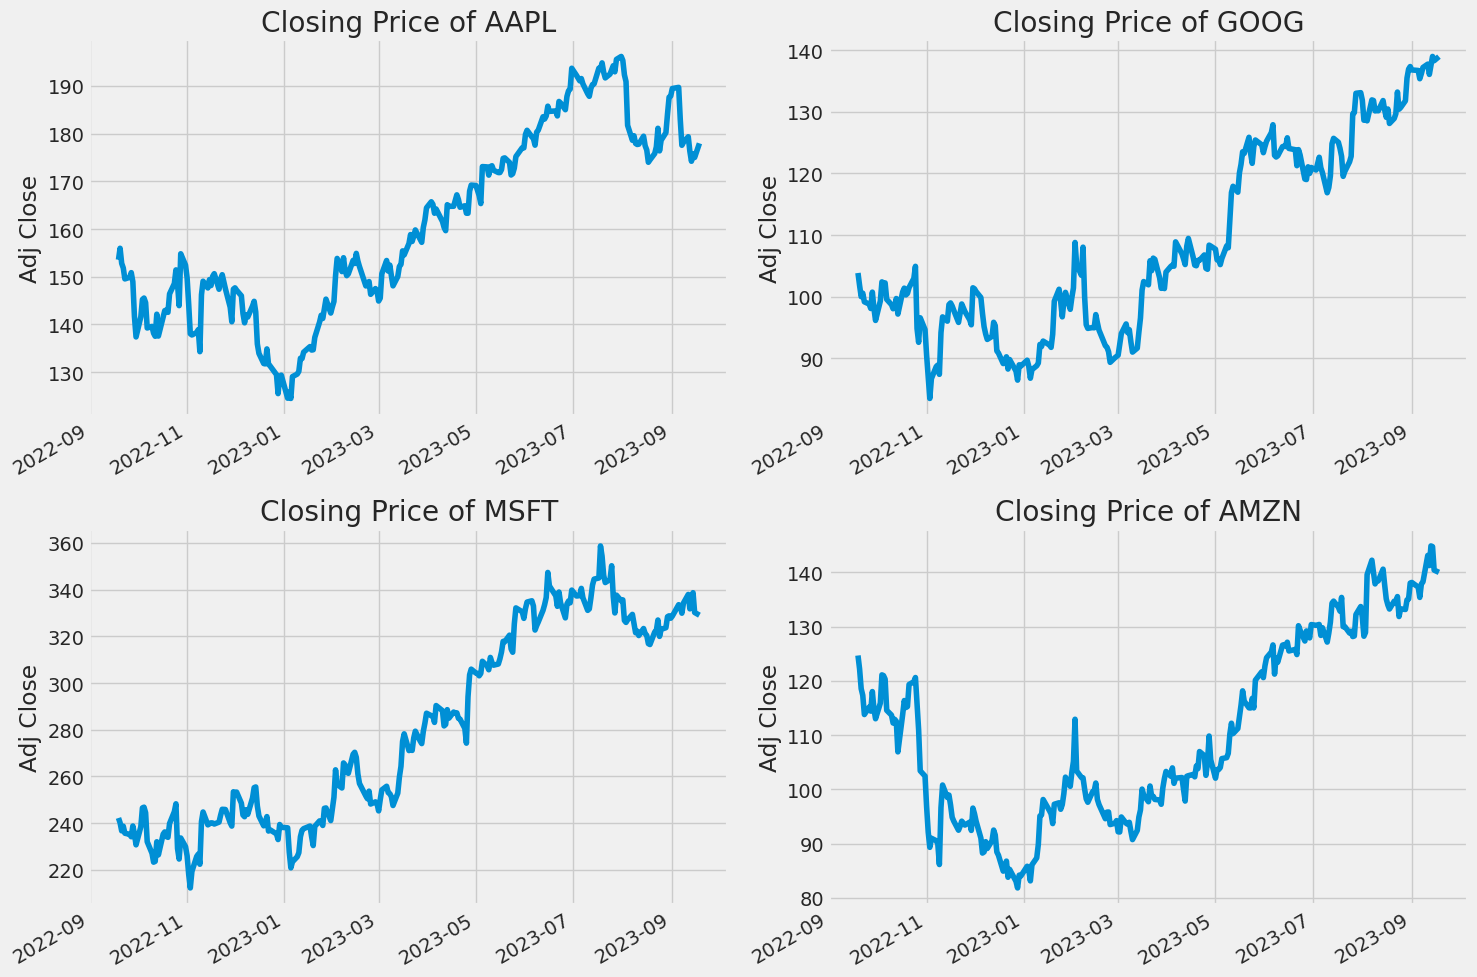

In [68]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):  # You have to oberve where list one is $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ (Paulo´s notes)
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


# Considering our diversified portifolio of stocks the month of sempter is the most proftable to our company investment in the market of stocks and
# throughout these data demonstrate taht the  company might invest in other markets or we use this profit in other ear

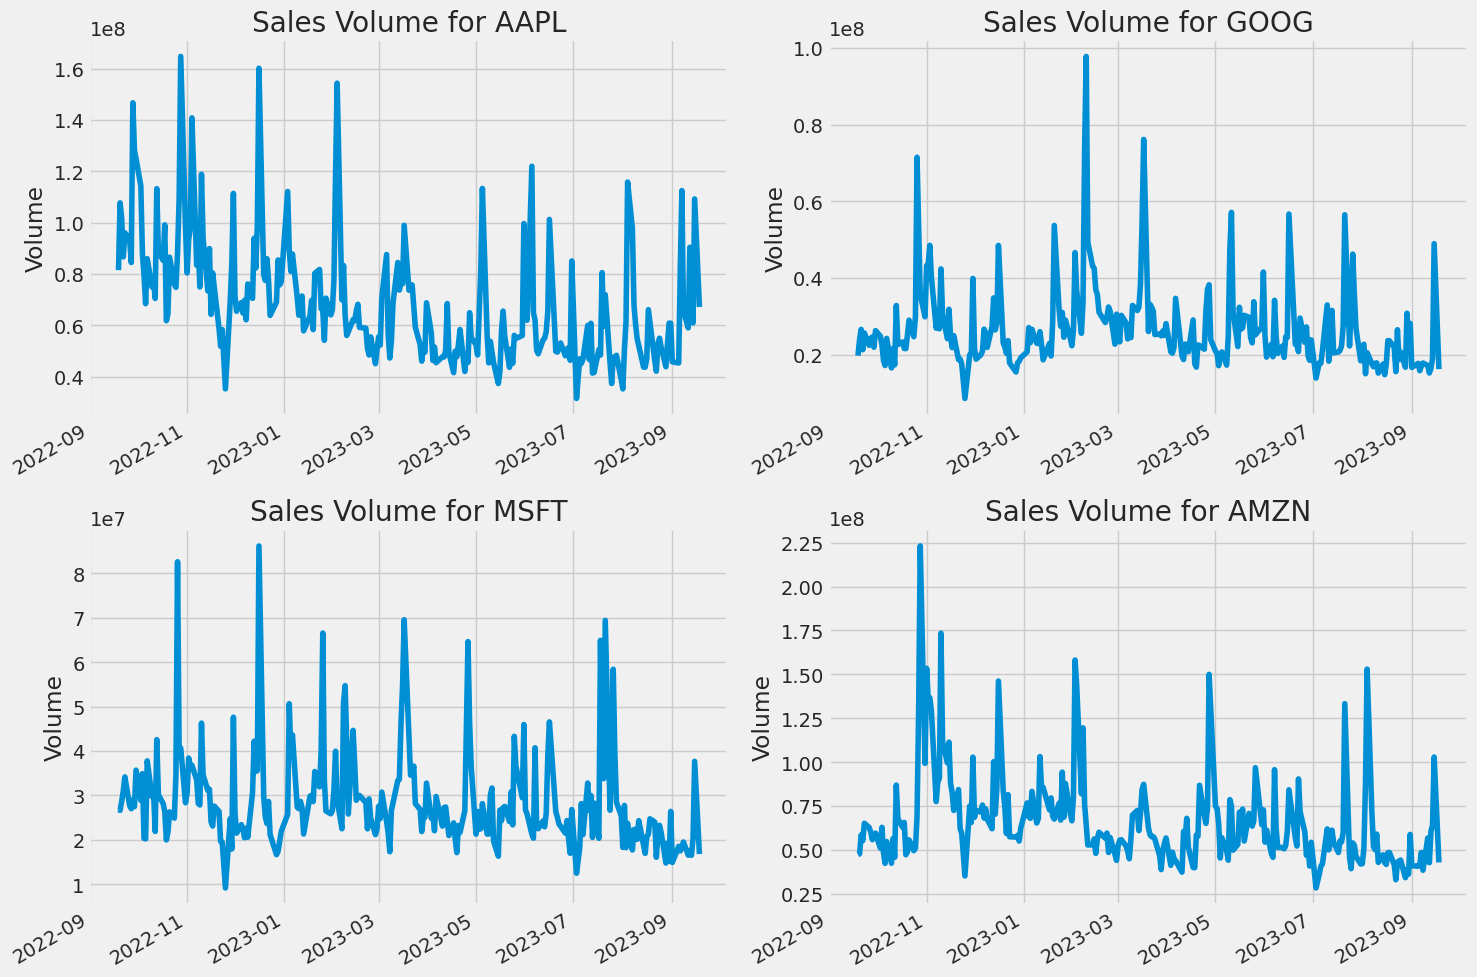

In [69]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# Now that we've seen the visualizations for the closing price and the volume traded each day,
# let's go ahead and caculate the moving average for the stock.

2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

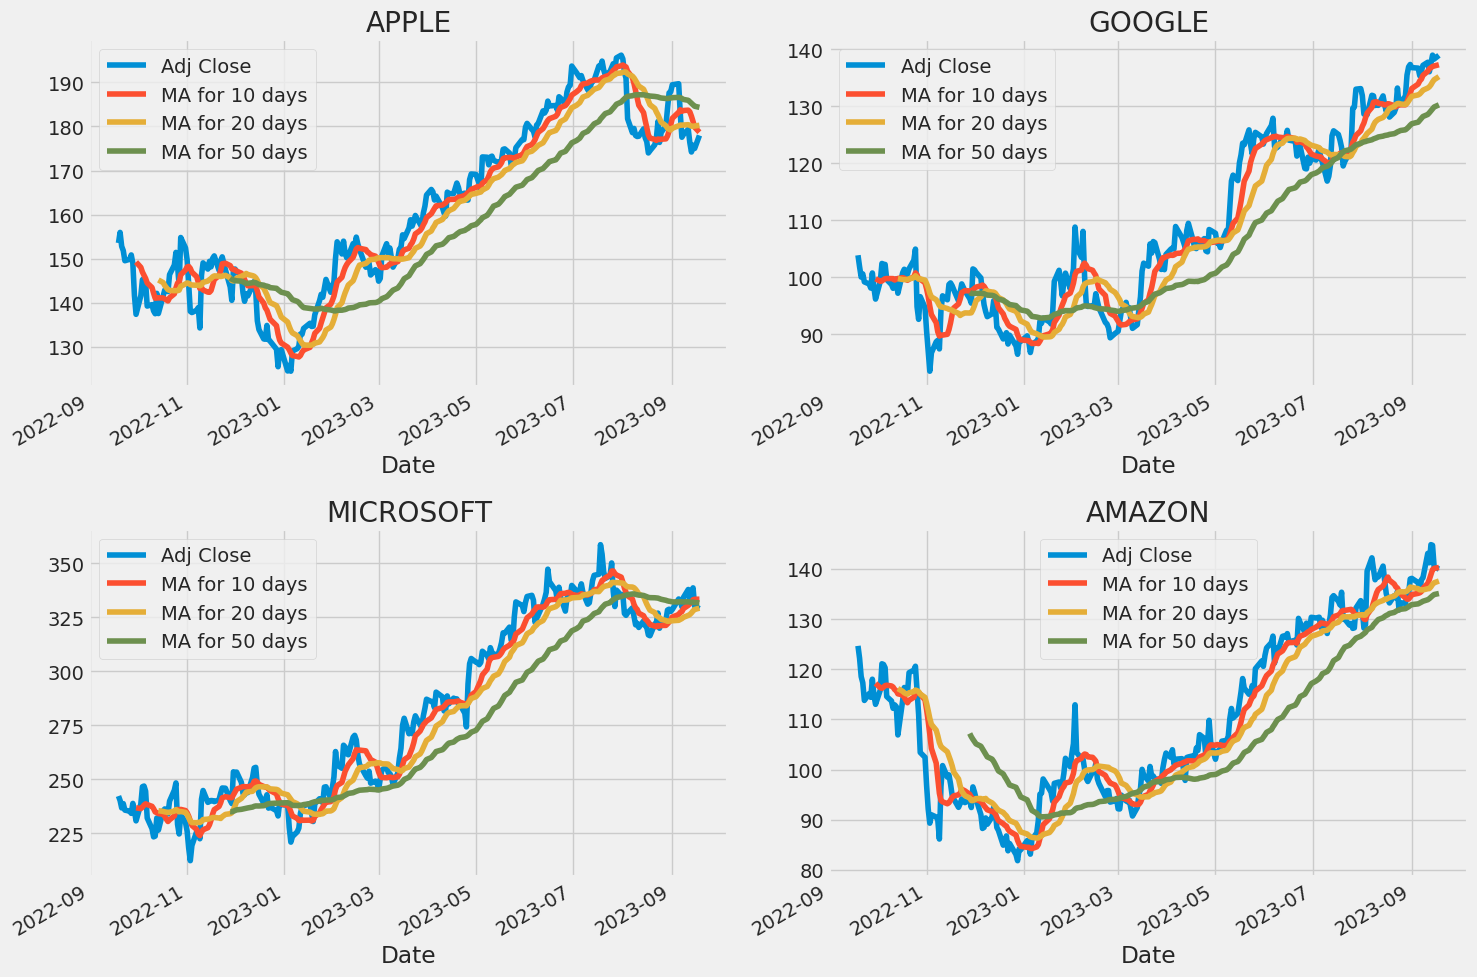

In [71]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# It is perceavible that stocks of Apple, Google, microsoft and Amazon are rising whereas as we are arrive the end of the year.

# We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

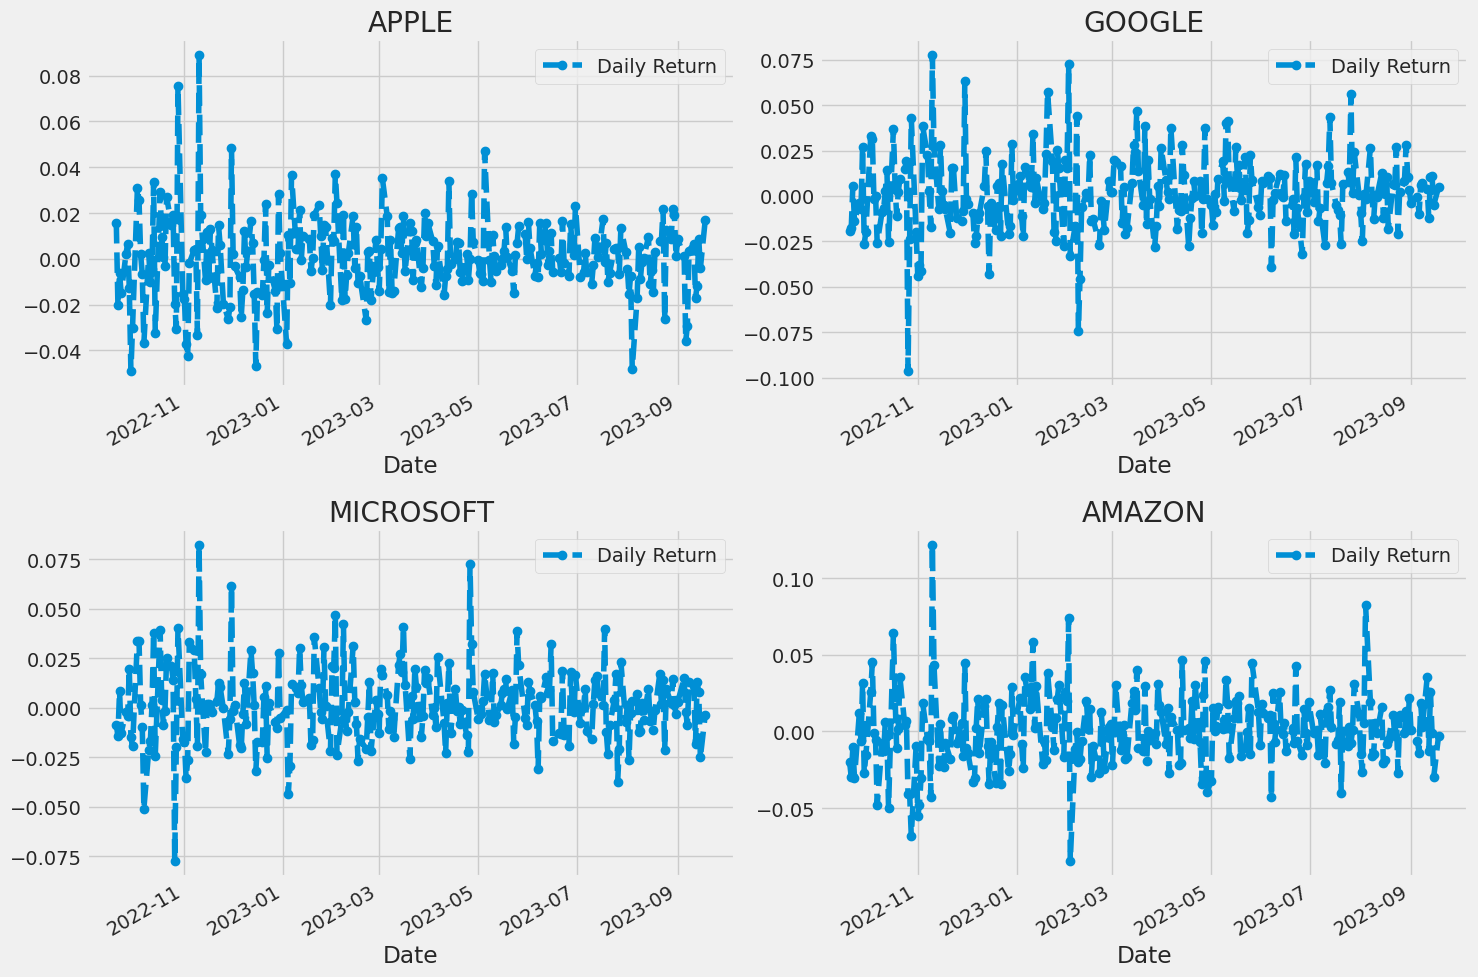

In [72]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

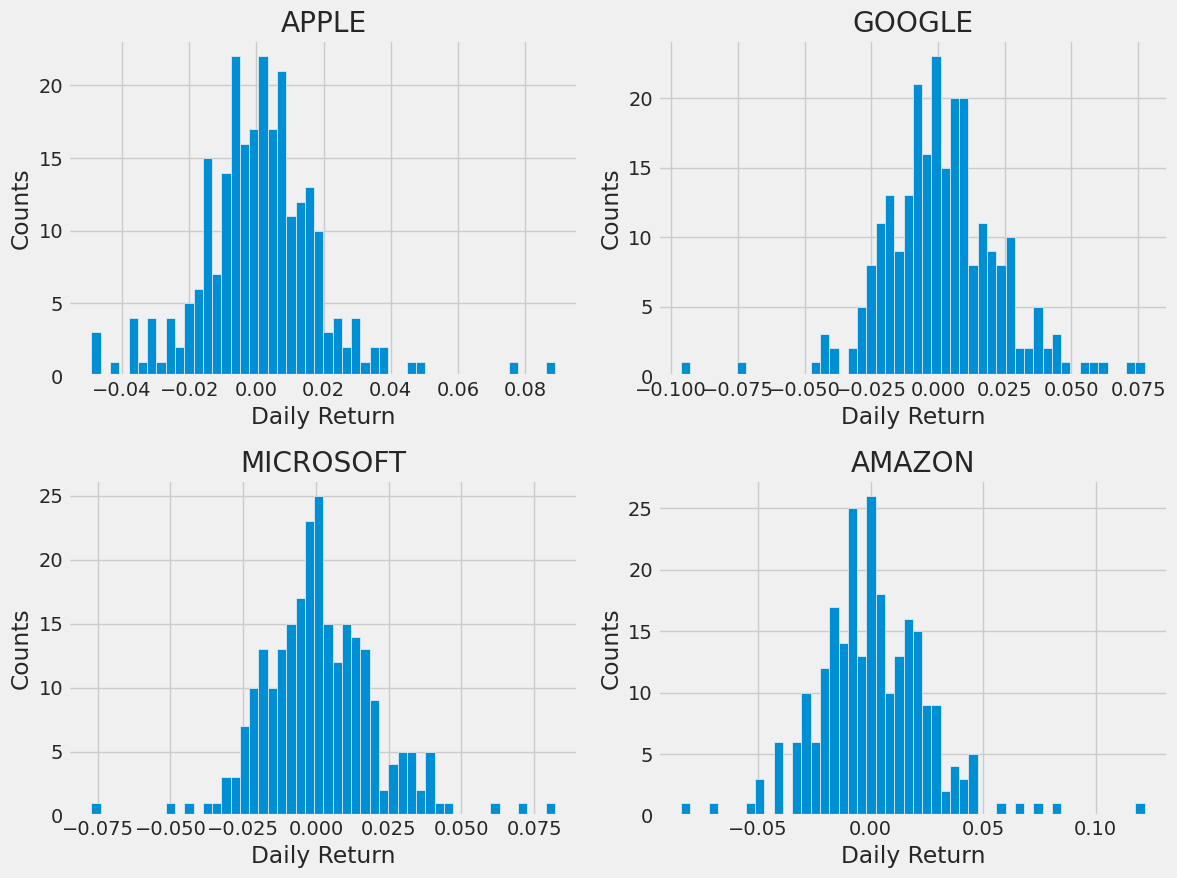

In [73]:
# Now we are gonna use the histgram to realize the distribuition of our data

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

4. What was the correlation between different stocks closing prices?¶
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [74]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


# Now we can compare the daily percentage return of two stocks to check how correlated.
# First let's see a sotck compared to itself.

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-19,NaN,NaN,NaN,NaN
2022-09-20,0.015665,-0.019814,-0.019451,-0.008466
2022-09-21,-0.020268,-0.029872,-0.017873,-0.014436
2022-09-22,-0.006375,-0.010376,0.005599,0.008495
2022-09-23,-0.015124,-0.030091,-0.013921,-0.012698


In [75]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-19,153.568970,124.660004,103.849998,242.180344
2022-09-20,155.974686,122.190002,101.830002,240.130157
2022-09-21,152.813461,118.540001,100.010002,236.663635
2022-09-22,151.839249,117.309998,100.570000,238.674210
2022-09-23,149.542847,113.779999,99.169998,235.643494


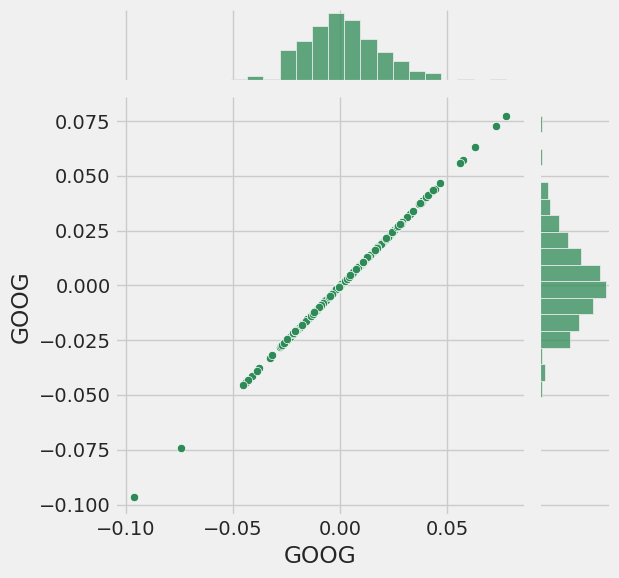

In [76]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

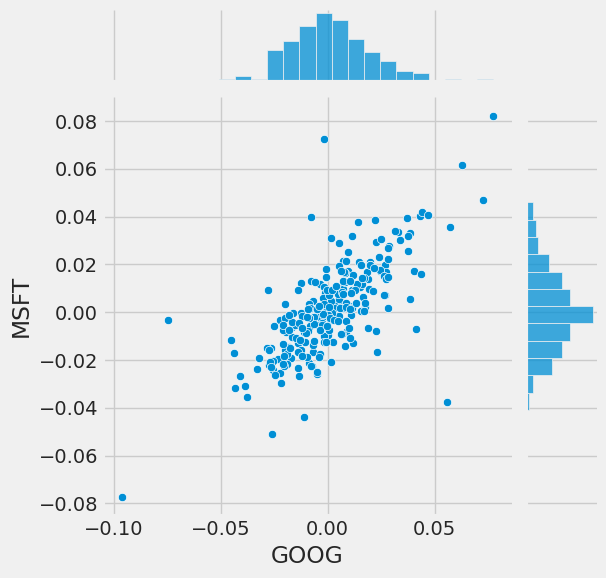

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft

# Comparing the stocks of GOOG and MSFT with stocks would be good to our company invest most
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

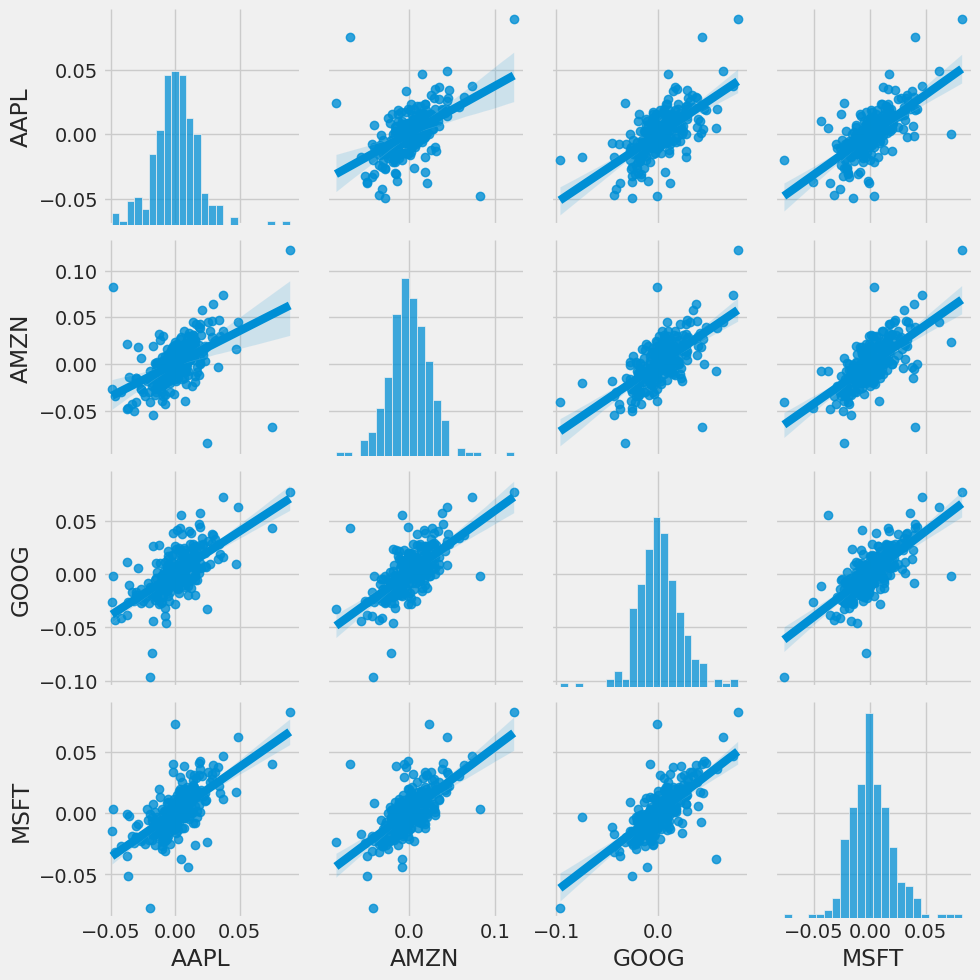

In [78]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row
# and the x-axes across a single column. The diagonal plots are treated differently:
# univariate distribution plot is drawn to show the marginal distribution of the data in each column.

# It is also possible to show a subset of variables or plot different variables on the rows and columns.

# This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles.
# You should use PairGrid directly if you need more flexibility.

sns.pairplot(tech_rets, kind='reg');

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

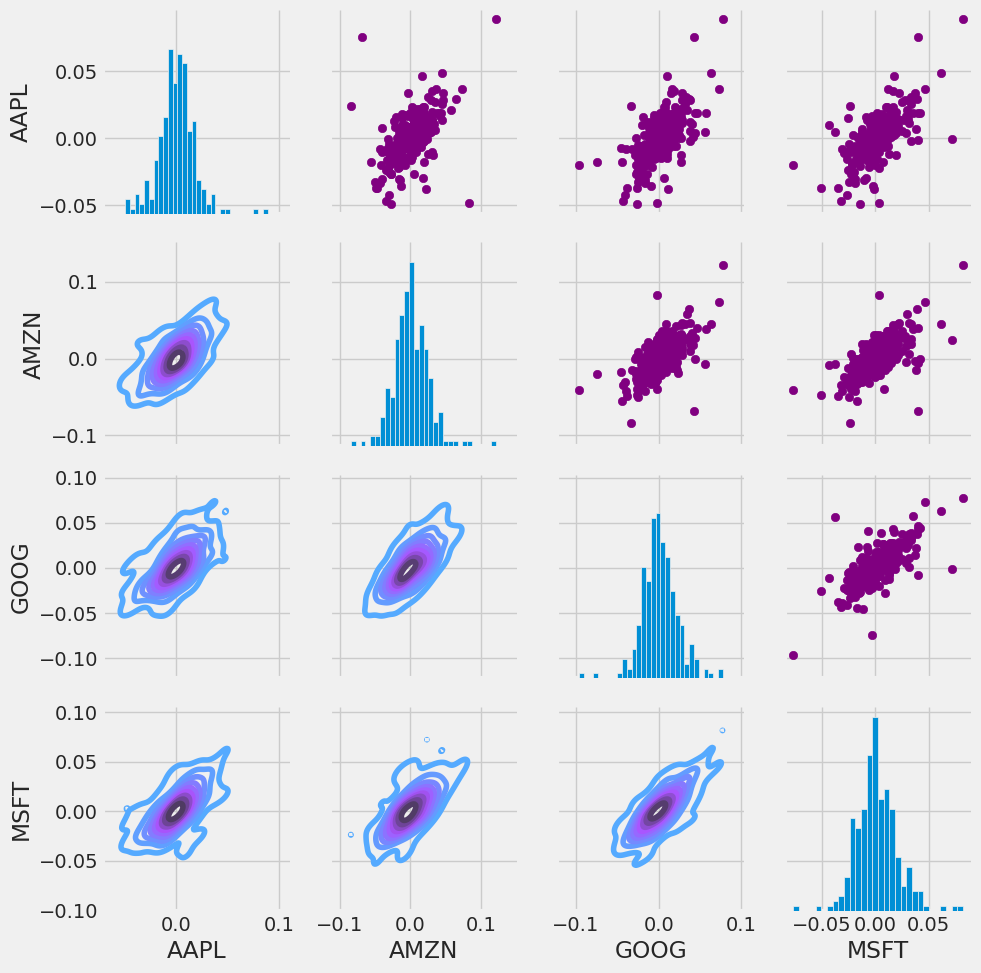

In [80]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30);

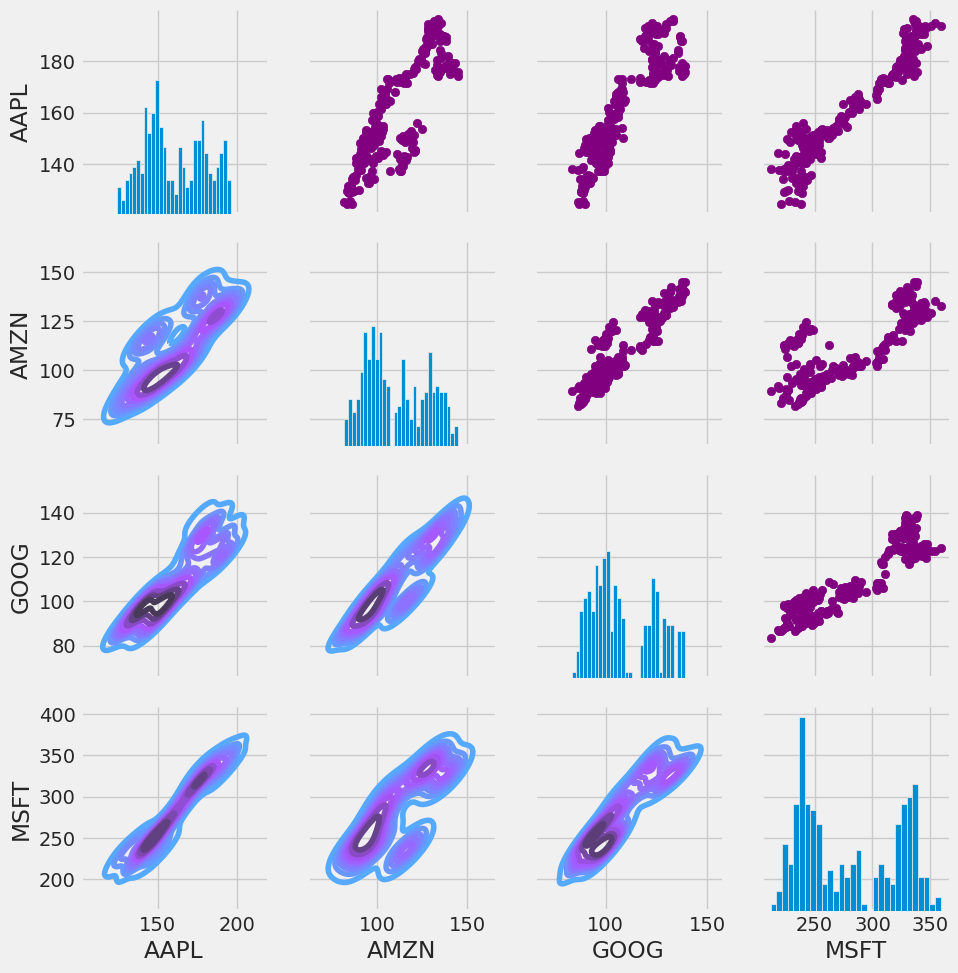

In [82]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30);

Text(0.5, 1.0, 'Correlation of stock closing price')

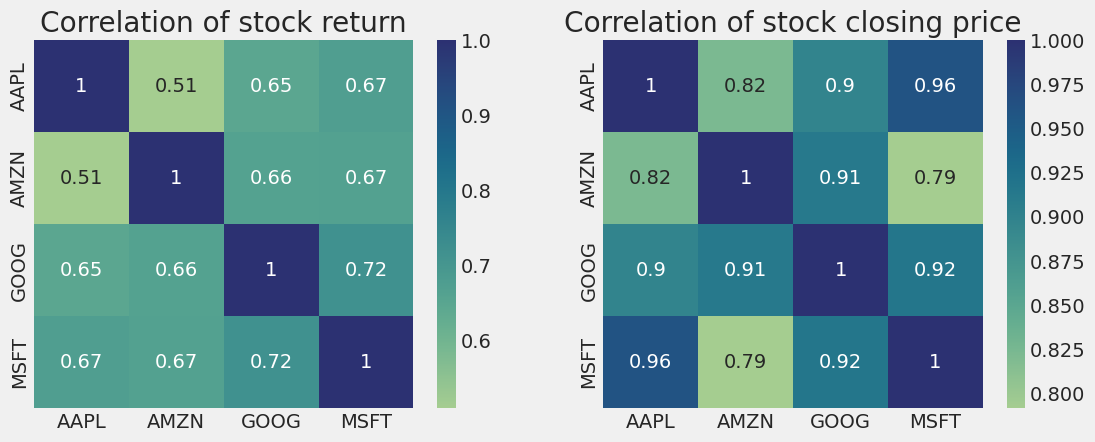

In [83]:
# Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.
# By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='crest')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='crest')
plt.title('Correlation of stock closing price')

# For passing the colors among blue and shades of green, I passed - sns.heatmap(closing_df.corr(), annot=True,cmap='crest')

# Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and
# Amazon had the strongest correlation of daily stock return.
# It's also interesting to see that all the technology comapnies are positively correlated.

5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

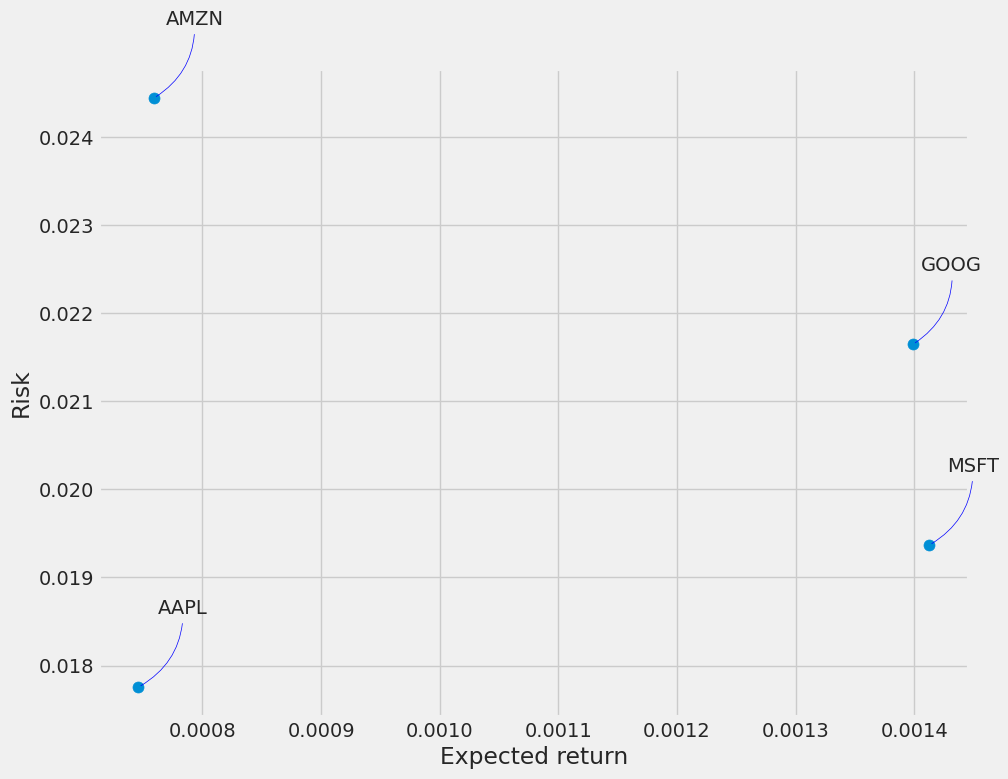

In [84]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [85]:
# 6. Predicting the closing price stock price of APPLE inc:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466090,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533088,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672227,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804700,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400
...,...,...,...,...,...,...
2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200
2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800


In [86]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2.946000e+03
mean,65.214376,65.931314,64.528460,65.257824,63.236239,1.949718e+08
std,53.474526,54.112795,52.879718,53.522998,54.053014,1.699676e+08
min,13.856071,14.271429,13.753571,13.947500,12.013329,3.145820e+07
25%,24.633750,24.850625,24.399017,24.659375,22.272988,8.900685e+07
50%,39.853750,40.181252,39.513750,39.926249,37.708078,1.333948e+08
75%,117.127501,118.754997,115.522501,116.567497,114.629227,2.362819e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.506120e+09


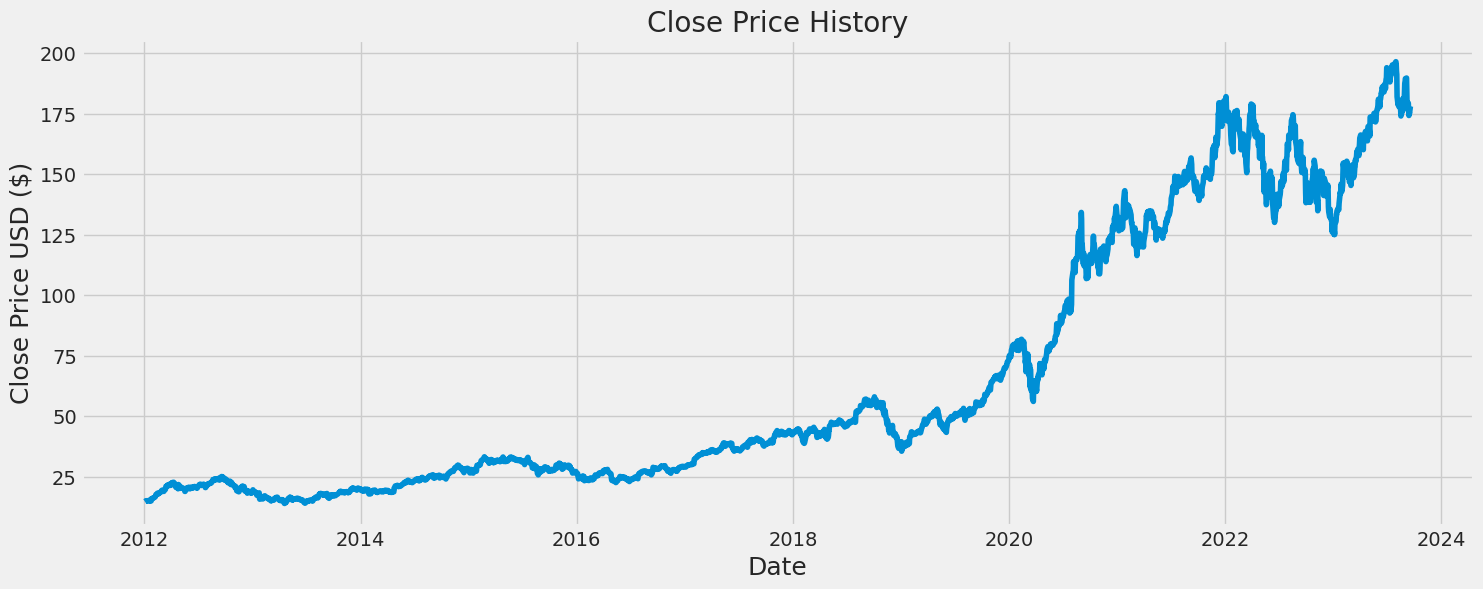

In [87]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# All long the year the Close Price History has been increasig all long the year and consider 2024 the close price might pop up a little bit more.


In [88]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2799

In [89]:
# Scale the data

# Transform features by scaling each feature to a given range.

# This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

# The transformation is given by:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.88652215],
       [0.88252214],
       [0.89874113]])

In [90]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [91]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2739/2739 [==============================] - 63s 22ms/step - loss: 0.0010


In [92]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 19ms/step


12.8020549639561

<ipython-input-93-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


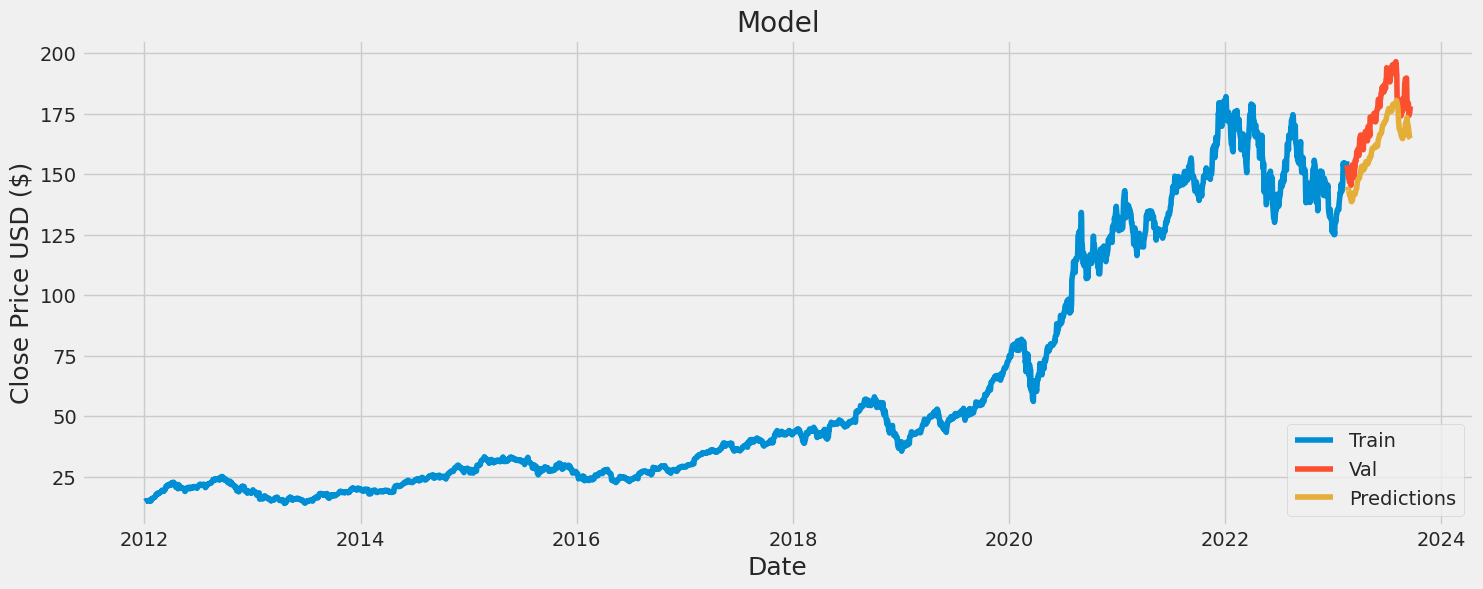

In [93]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [94]:
valid

,Close,Predictions
Date,,
2023-02-16,153.710007,143.326202
2023-02-17,152.550003,143.706573
2023-02-21,148.479996,143.722672
2023-02-22,148.910004,142.915085
2023-02-23,149.399994,142.067886
...,...,...
2023-09-12,176.300003,168.467438
2023-09-13,174.210007,167.280624
2023-09-14,175.740005,165.993484


In [ ]:
Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.
Do you have any questions? Ask your questions in the comments below and I will do my best to answer.